# Multiple Linear Regression Analysis on Toyota Corolla Dataset

This notebook performs:
1. Exploratory Data Analysis (EDA)
2. Preprocessing (handling categorical, scaling, missing values)
3. Train-test split
4. Build Multiple Linear Regression models (3 variations)
5. Apply Ridge and Lasso regularization
6. Evaluate models with MAE, RMSE, R square
7. Interpret coefficients

In [53]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

In [54]:
# Load dataset
df=pd.read_csv("ToyotaCorolla - MLR.csv")
print("Columns:",df.columns.tolist())
df.head()

Columns: ['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [55]:
# Descriptive statistics
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [57]:
df.isna().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [58]:
df['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [59]:
df.corr(numeric_only=True)

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000


In [60]:
df.drop(['Cylinders'],axis=1,inplace=True) #Since cylinders column is a constant we can safely drop it as it doesnt add much value to our model 

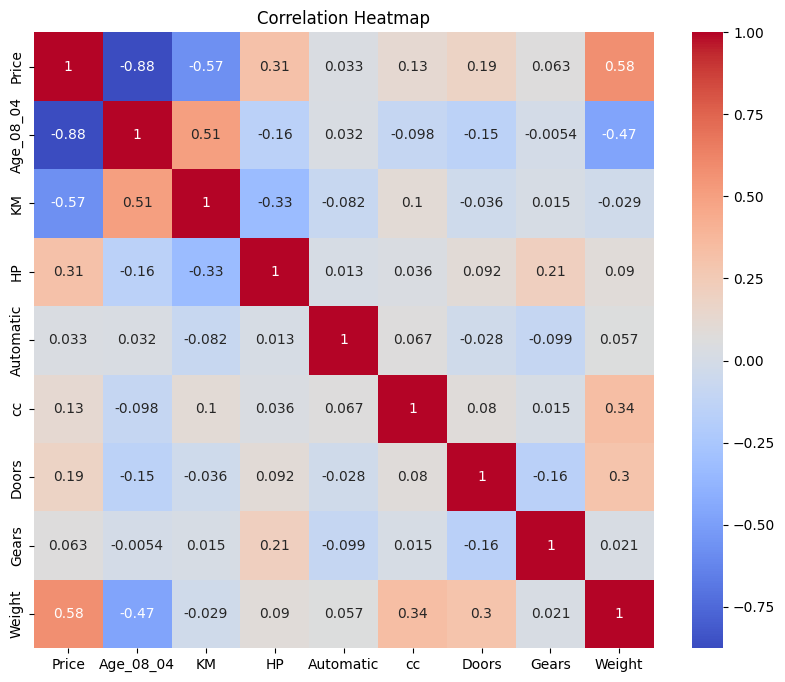

In [61]:
#Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

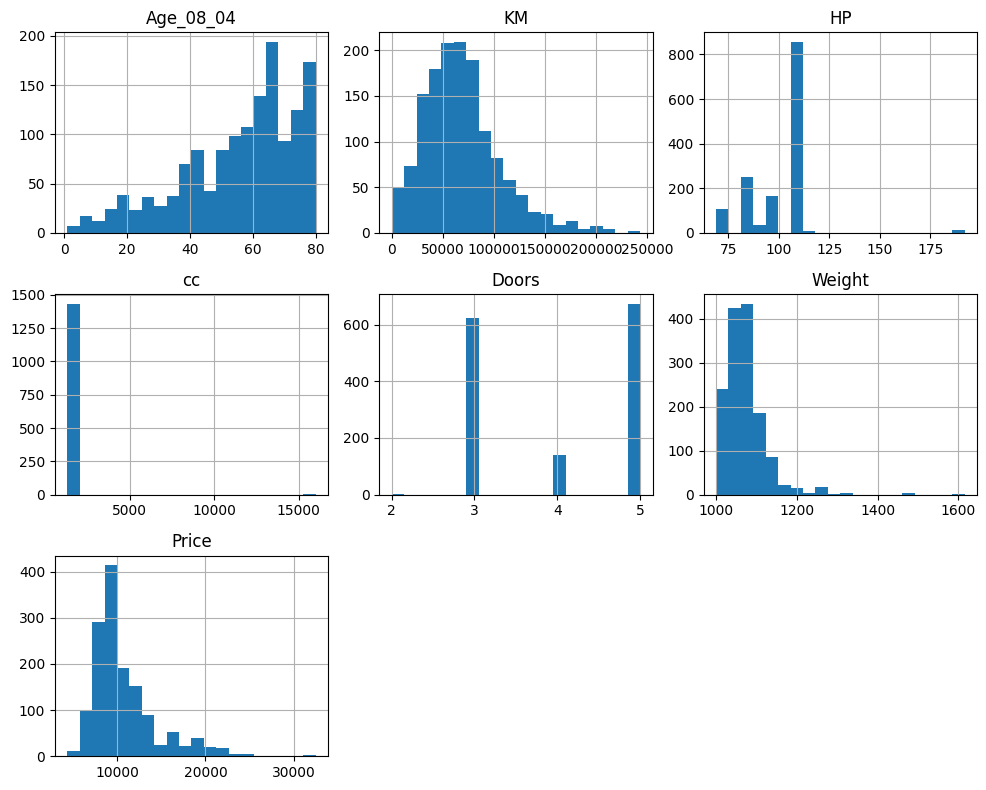

In [62]:
#Visualisations:
num_cols=['Age_08_04','KM','HP','cc','Doors','Weight','Price']    #Distribution of numerical features
df[num_cols].hist(figsize=(10,8), bins=20)
plt.tight_layout()
plt.show()

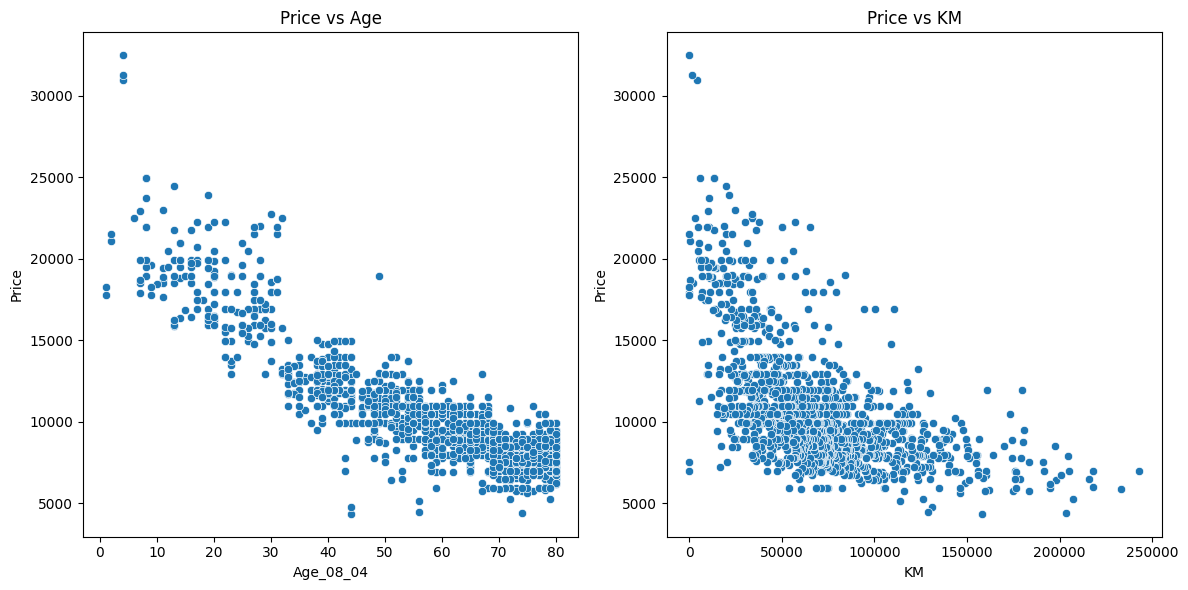

In [63]:
#Scatterplots of Price vs important features
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(x=df['Age_08_04'], y=df['Price'])
plt.title("Price vs Age")

plt.subplot(1,2,2)
sns.scatterplot(x=df['KM'], y=df['Price'])
plt.title("Price vs KM")

plt.tight_layout()
plt.show()

In [64]:
#Feature Selection
features=['Age_08_04','KM','Fuel_Type','HP','Automatic','cc','Doors','Weight']
X=df[features].copy()
y=df['Price'].copy()

#Convert Fuel_Type to categorical (for encoding)
X['Fuel_Type']=X['Fuel_Type'].astype('category')

#Train-Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [65]:
#One-Hot Encoding for Fuel_Type
X_train=pd.get_dummies(X_train,columns=['Fuel_Type'],drop_first=True).astype(int)
X_test=pd.get_dummies(X_test,columns=['Fuel_Type'],drop_first=True).astype(int)

#Match columns in test set with train set
X_test=X_test.reindex(columns=X_train.columns,fill_value=0)

X_train.head()

,Age_08_04,KM,HP,Automatic,cc,Doors,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
899,62,59295,86,0,1300,5,1035,0,1
881,68,61568,110,0,1600,4,1035,0,1
310,40,38653,110,0,1600,5,1080,0,1
1145,75,101855,110,0,1600,5,1070,0,1
31,22,35199,97,0,1400,3,1100,0,1


In [66]:
X_test.head()

,Age_08_04,KM,HP,Automatic,cc,Doors,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
594,50,22500,97,0,1400,3,1025,0,1
754,68,80426,110,0,1600,3,1055,0,1
630,59,130000,72,0,2000,4,1135,1,0
1259,71,76000,110,0,1600,5,1070,0,1
903,65,59000,110,0,1600,5,1075,0,1


In [67]:
#Standardize numerical features
scaler=StandardScaler()
num_cols=['Age_08_04','KM','HP','cc','Doors','Weight','Automatic']

X_train[num_cols]=scaler.fit_transform(X_train[num_cols])
X_test[num_cols]=scaler.transform(X_test[num_cols])

#Preview the processed training data
X_train.head()

,Age_08_04,KM,HP,Automatic,cc,Doors,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
899,0.329691,-0.254372,-1.027080,-0.244987,-0.601694,1.009250,-0.745518,0,1
881,0.649448,-0.194054,0.590140,-0.244987,0.041697,-0.040224,-0.745518,0,1
310,-0.842750,-0.802147,0.590140,-0.244987,0.041697,1.009250,0.139056,0,1
1145,1.022497,0.875038,0.590140,-0.244987,0.041697,1.009250,-0.057516,0,1
31,-1.802020,-0.893805,-0.285854,-0.244987,-0.387231,-1.089698,0.532200,0,1


In [68]:
X_test.head()

,Age_08_04,KM,HP,Automatic,cc,Doors,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
594,-0.309822,-1.230797,-0.285854,-0.244987,-0.387231,-1.089698,-0.942090,0,1
754,0.649448,0.306379,0.590140,-0.244987,0.041697,-1.089698,-0.352374,0,1
630,0.169813,1.621919,-1.970458,-0.244987,0.899553,-0.040224,1.220202,1,0
1259,0.809326,0.188927,0.590140,-0.244987,0.041697,1.009250,-0.057516,0,1
903,0.489569,-0.262201,0.590140,-0.244987,0.041697,1.009250,0.040770,0,1


In [69]:
#1.Model A: Full OLS Regression
#Add constant for intercept
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

# Fit model
modelA=sm.OLS(y_train, X_train_sm).fit()
print("Model A Summary:")
print(modelA.summary())

# Predictions
y_pred_A=modelA.predict(X_test_sm)

Model A Summary:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     842.1
Date:                Thu, 11 Sep 2025   Prob (F-statistic):               0.00
Time:                        13:59:56   Log-Likelihood:                -9866.8
No. Observations:                1148   AIC:                         1.975e+04
Df Residuals:                    1138   BIC:                         1.980e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             9486.

In [70]:
y_pred_A

594     11152.769507
754      9036.503824
630      9274.281234
1259     8966.597819
903     10092.639776
            ...     
174     19197.155828
1428     8007.699952
297     13524.847910
1435    10719.956247
1009    10685.940448
Length: 288, dtype: float64

In [71]:
#Model A (Full OLS)- Interpretation of coefficients
print("Model A Coefficients(Full OLS)")
coef_A = pd.DataFrame({
    "Feature":X_train_sm.columns,
    "Coefficient":modelA.params,
    "P-value":modelA.pvalues
})
print(coef_A.reset_index(drop=True))

Model A Coefficients(Full OLS)
            Feature  Coefficient        P-value
0             const  9486.368963  6.095022e-138
1         Age_08_04 -2267.156303  9.704222e-232
2                KM  -600.179991   3.668899e-26
3                HP   234.138332   8.004426e-05
4         Automatic    21.512689   5.979149e-01
5                cc   -14.098311   7.392799e-01
6             Doors   -80.500836   5.594648e-02
7            Weight  1326.190352   3.019080e-60
8  Fuel_Type_Diesel     4.202110   9.914434e-01
9  Fuel_Type_Petrol  1453.694461   1.596050e-05


In [72]:
print("Interpretation (Model A):")
for feat, coef in modelA.params.items():
    if feat!="const":
        if coef>0:
            print(f"- If {feat} goes up by 1, Price also increases by about {coef:.2f}.")
        else:
            print(f"- If {feat} goes up by 1, Price goes down by about {abs(coef):.2f}.")

Interpretation (Model A):
- If Age_08_04 goes up by 1, Price goes down by about 2267.16.
- If KM goes up by 1, Price goes down by about 600.18.
- If HP goes up by 1, Price also increases by about 234.14.
- If Automatic goes up by 1, Price also increases by about 21.51.
- If cc goes up by 1, Price goes down by about 14.10.
- If Doors goes up by 1, Price goes down by about 80.50.
- If Weight goes up by 1, Price also increases by about 1326.19.
- If Fuel_Type_Diesel goes up by 1, Price also increases by about 4.20.
- If Fuel_Type_Petrol goes up by 1, Price also increases by about 1453.69.


In [73]:
#2.ModelB: Polynomial Interactions
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

linreg_poly=LinearRegression()
linreg_poly.fit(X_train_poly,y_train)

y_pred_B=linreg_poly.predict(X_test_poly)

In [74]:
y_pred_B

array([10750.51169411,  8944.85267187,  9248.53852063,  8849.54076874,
        9824.57272028,  8021.19273523,  8603.3451714 ,  8220.98966052,
       13548.75911791, 12757.90947365,  9501.58940002,  9161.58745929,
       12490.49642889, 12099.87588156,  9699.8558489 ,  8638.32555128,
       11381.22315285, 18451.67740944,  7855.0105294 ,  9003.77973591,
       12259.48441128, 18577.3074286 ,  7898.49572148, 10087.21741105,
        8295.52275178, 16501.23452738,  9796.34863086,  7800.18642404,
       15636.68179461, 14063.34311152,  8281.16678342,  9335.16887124,
        8470.11535861,  9958.48902572, 10083.95258503,  8141.85208076,
        8644.66179571,  9839.33821876, 16480.00787091,  9448.21075706,
        9690.32835752,  9400.96900631,  7967.45879497,  6957.85606468,
        7740.39456444, 18527.20637459,  9371.80196325, 10393.640955  ,
        8963.29759451, 13111.7277668 , 12703.12363548,  7460.79382535,
       15073.10729006, 16709.45220193,  7265.47778437,  7916.34760419,
      

In [75]:
print("Model B Coefficients(Polynomial Regression)")
coef_B=pd.DataFrame({
    "Feature":poly.get_feature_names_out(X_train.columns),
    "Coefficient":linreg_poly.coef_
})
print(coef_B.reset_index(drop=True).head(15))  #showing first 15 to avoid huge output

Model B Coefficients(Polynomial Regression)
                Feature    Coefficient
0             Age_08_04   -1324.954479
1                    KM   -1700.560472
2                    HP   -2300.740680
3             Automatic   -1066.534159
4                    cc  253077.355230
5                 Doors       3.902217
6                Weight   -1565.876163
7      Fuel_Type_Diesel    3856.427505
8      Fuel_Type_Petrol    7811.622020
9          Age_08_04 KM     197.219921
10         Age_08_04 HP     350.012540
11  Age_08_04 Automatic     134.236926
12         Age_08_04 cc   -1062.518282
13      Age_08_04 Doors     205.757206
14     Age_08_04 Weight    -848.772591


In [76]:
print("Interpretation (Model B):")
print("-Model B has extra polynomial/interaction terms.")
print("-Positive coefficient => pushes Price up, Negative coefficient => pushes Price down.")
print("-Exact meaning is harder because of the interaction between features.")

Interpretation (Model B):
-Model B has extra polynomial/interaction terms.
-Positive coefficient => pushes Price up, Negative coefficient => pushes Price down.
-Exact meaning is harder because of the interaction between features.


In [77]:
#3. Model C: Reduced OLS (keep only significant features from Model A)
#In Model A (Full OLS), we included all features.But not all features may be important, some may have very high 
#p-values (statistically insignificant).So in Model C, we try to build a simpler model by keeping only the significant predictors
#Get p-values
pvalues=modelA.pvalues.sort_values()

# Keep only features with p<0.05
significant=pvalues[pvalues<0.05].index.tolist()

# Remove constant if it slipped in
if 'const' in significant:
    significant.remove('const')

#If no significant features, pick top 5 by t-value
if len(significant)==0:
    significant=modelA.tvalues.abs().sort_values(ascending=False).head(5).index.tolist()

X_train_C=sm.add_constant(X_train[significant])
X_test_C=sm.add_constant(X_test[significant])

modelC=sm.OLS(y_train, X_train_C).fit()
print("Model C Summary:")
print(modelC.summary())

y_pred_C=modelC.predict(X_test_C)

Model C Summary:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1514.
Date:                Thu, 11 Sep 2025   Prob (F-statistic):               0.00
Time:                        14:00:17   Log-Likelihood:                -9869.0
No. Observations:                1148   AIC:                         1.975e+04
Df Residuals:                    1142   BIC:                         1.978e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             9548.

In [78]:
y_pred_C

594     11103.738638
754      8960.322473
630      9275.408787
1259     9050.187303
903     10176.572226
            ...     
174     19244.703400
1428     7963.349456
297     13605.781137
1435    10794.994643
1009    10624.979852
Length: 288, dtype: float64

In [79]:
#Model C(Reduced OLS) - Interpretation of coefficients
print("Model C Coefficients(Reduced OLS)")
coef_C=pd.DataFrame({
    "Feature":X_train_C.columns,
    "Coefficient":modelC.params,
    "P-value":modelC.pvalues
})
print(coef_C.reset_index(drop=True))

Model C Coefficients(Reduced OLS)
            Feature  Coefficient        P-value
0             const  9548.151535  3.686026e-286
1         Age_08_04 -2263.657376  6.588596e-236
2            Weight  1288.546812   3.397477e-77
3                KM  -611.621559   2.365676e-27
4  Fuel_Type_Petrol  1383.384653   2.603125e-10
5                HP   237.828596   3.965141e-06


In [80]:
print("Interpretation of Model C Coefficients:")
for feat, coef in modelC.params.items():
    if feat!="const":
        if coef>0:
            print(f"- If {feat} goes up by 1, Price also increases by about {coef:.2f}.")
        else:
            print(f"- If {feat} goes up by 1, Price goes down by about {abs(coef):.2f}.")

Interpretation of Model C Coefficients:
- If Age_08_04 goes up by 1, Price goes down by about 2263.66.
- If Weight goes up by 1, Price also increases by about 1288.55.
- If KM goes up by 1, Price goes down by about 611.62.
- If Fuel_Type_Petrol goes up by 1, Price also increases by about 1383.38.
- If HP goes up by 1, Price also increases by about 237.83.


In [81]:
#4.Evaluation Function
def evaluate_model(y_true,y_pred,name):
    mae=mean_absolute_error(y_true, y_pred)
    rmse=np.sqrt(mean_squared_error(y_true,y_pred))
    r2=r2_score(y_true,y_pred)
    print(f"{name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.3f}")

# Evaluate all models
evaluate_model(y_test,y_pred_A, "Model A - Full OLS")
evaluate_model(y_test,y_pred_B, "Model B - Polynomial")
evaluate_model(y_test,y_pred_C, "Model C - Reduced OLS")

Model A - Full OLS Performance:
MAE: 992.30
RMSE: 1491.41
R²: 0.833
Model B - Polynomial Performance:
MAE: 881.16
RMSE: 1730.85
R²: 0.775
Model C - Reduced OLS Performance:
MAE: 1001.24
RMSE: 1489.88
R²: 0.834


In [82]:
#5.Regularization (Ridge)
ridge=Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge=ridge.predict(X_test)

In [83]:
#Evaluate Ridge
evaluate_model(y_test,y_pred_ridge,"Ridge Regression")

Ridge Regression Performance:
MAE: 992.10
RMSE: 1489.65
R²: 0.834


In [84]:
#Ridge Regression coefficients
print("Ridge Regression Coefficients")
coef_ridge = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": ridge.coef_
})
print(coef_ridge.reset_index(drop=True))

Ridge Regression Coefficients
            Feature  Coefficient
0         Age_08_04 -2264.021938
1                KM  -605.265261
2                HP   236.039609
3         Automatic    21.938804
4                cc   -13.987302
5             Doors   -79.030910
6            Weight  1320.868640
7  Fuel_Type_Diesel   -61.438237
8  Fuel_Type_Petrol  1365.234743


In [85]:
print("Interpretation of Ridge Regression coefficients:")
for feat in X_train.columns:
    coef=ridge.coef_[list(X_train.columns).index(feat)]
    if coef>0:
        print(f"- When {feat} increases, Price also increases(but effect is smaller than OLS).")
    elif coef<0:
        print(f"- When {feat} increases, Price decreases(effect is smaller than OLS).")
    else:
        print(f"- {feat} has almost no effect (close to 0).")

Interpretation of Ridge Regression coefficients:
- When Age_08_04 increases, Price decreases(effect is smaller than OLS).
- When KM increases, Price decreases(effect is smaller than OLS).
- When HP increases, Price also increases(but effect is smaller than OLS).
- When Automatic increases, Price also increases(but effect is smaller than OLS).
- When cc increases, Price decreases(effect is smaller than OLS).
- When Doors increases, Price decreases(effect is smaller than OLS).
- When Weight increases, Price also increases(but effect is smaller than OLS).
- When Fuel_Type_Diesel increases, Price decreases(effect is smaller than OLS).
- When Fuel_Type_Petrol increases, Price also increases(but effect is smaller than OLS).


In [86]:
#5.Regularization(lasso)
lasso=Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
y_pred_lasso=lasso.predict(X_test)

In [87]:
#Evaluate Lasso
evaluate_model(y_test,y_pred_lasso,"Lasso Regression")

Lasso Regression Performance:
MAE: 992.30
RMSE: 1491.43
R²: 0.833


In [88]:
#Lasso Regression - Interpretation of coefficients
print("Lasso Regression Coefficients")
coef_lasso = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": lasso.coef_
})
print(coef_lasso.reset_index(drop=True))

Lasso Regression Coefficients
            Feature  Coefficient
0         Age_08_04 -2267.131412
1                KM  -600.201514
2                HP   234.057201
3         Automatic    21.487289
4                cc   -14.066416
5             Doors   -80.497762
6            Weight  1326.235253
7  Fuel_Type_Diesel     2.520170
8  Fuel_Type_Petrol  1452.313793


In [89]:
print("Interpretation of Lasso Regression coefficients:")
for feat in X_train.columns:
    coef=lasso.coef_[list(X_train.columns).index(feat)]
    if coef>0:
        print(f"- {feat} increases the Price.")
    elif coef<0:
        print(f"- {feat} decreases the Price.")
    else:
        print(f"- {feat} was dropped by Lasso (coefficient = 0).")

Interpretation of Lasso Regression coefficients:
- Age_08_04 decreases the Price.
- KM decreases the Price.
- HP increases the Price.
- Automatic increases the Price.
- cc decreases the Price.
- Doors decreases the Price.
- Weight increases the Price.
- Fuel_Type_Diesel increases the Price.
- Fuel_Type_Petrol increases the Price.


#### Summary of Findings  

- Model A (Full OLS) included all features, but not all were significant.  
- Model B (Polynomial) added interaction terms, but did not give a big improvement.  
- Model C (Reduced OLS) performed better by keeping only significant predictors.  
- Ridge and Lasso helped handle multicollinearity and reduced the effect of less important features.  
- Overall, simpler models with important features gave more reliable results than complex ones.  

### Assumptions Made and Their Implications  

- **Linearity**: Assumed that a roughly linear relation between features and Price. If not true, model predictions may not be accurate.  
- **Independence**: Each car record is assumed independent. If not, results could be biased.  
- **Multicollinearity**: Assumed that features are not highly correlated. Too much correlation makes coefficients unreliable.  
- **Scaling**: Numeric features were scaled so Ridge and Lasso give fair results.  


### Interview Questions:

1. What is Normalization & Standardization and how is it helpful?  
- **Normalization**: This method scales the values of a feature into a specific range, usually between 0 and 1. It is helpful when the dataset has features with very different scales or units, so that no feature dominates the others just because of its larger values. For example, "Age" (in years) and "Salary" (in lakhs) can be brought to the same scale.  
- **Standardization**: This technique transforms the data so that it has a mean of 0 and a standard deviation of 1. It doesn’t bound the values to a fixed range but ensures all features have similar distribution. It is especially useful for algorithms that assume data is normally distributed, such as linear regression or logistic regression.  
- **Helpfulness**: Both methods make training more stable, improve convergence speed, and give fair importance to all features in models like regression, SVM, Ridge, and Lasso. 
    * They make sure no single feature dominates due to scale, and they improve the performance of models like regression, SVM, Ridge, and Lasso.   

---

2. What techniques can be used to address multicollinearity in multiple linear regression?  
- **Remove one of the correlated features**: If two variables provide the same information, we can drop one of them to simplify the model.  
- **Combine correlated features**: Sometimes we can combine related features (e.g., taking an average or creating an index) to reduce redundancy.  
- **Principal Component Analysis (PCA)**: PCA transforms correlated features into new uncorrelated components, which helps in handling multicollinearity while still keeping most of the information.  
- **Regularization methods**: Techniques like Ridge regression and Lasso regression add a penalty to large coefficients. Ridge handles multicollinearity by shrinking coefficients, while Lasso can even eliminate less important correlated features.  
- **Collect more data**: Sometimes, increasing the dataset size can reduce the effect of multicollinearity by giving the model more variation to learn from.  
